# Project: Analysis of 1.88 Million US Wildfires over 24 years of geo-referenced wildfire records

In [1]:
import sqlite3
import pandas as pd

In [2]:
con = sqlite3.connect(r'C:\Users\ajinkya.patil\OneDrive - Prime Boiler Services Ltd\Desktop\Python\Project\FPA_FOD_20170508.sqlite')

In [3]:
df = pd.read_sql_query('select * from Fires', con)

In [4]:
df.dtypes

OBJECTID                        int64
FOD_ID                          int64
FPA_ID                         object
SOURCE_SYSTEM_TYPE             object
SOURCE_SYSTEM                  object
NWCG_REPORTING_AGENCY          object
NWCG_REPORTING_UNIT_ID         object
NWCG_REPORTING_UNIT_NAME       object
SOURCE_REPORTING_UNIT          object
SOURCE_REPORTING_UNIT_NAME     object
LOCAL_FIRE_REPORT_ID           object
LOCAL_INCIDENT_ID              object
FIRE_CODE                      object
FIRE_NAME                      object
ICS_209_INCIDENT_NUMBER        object
ICS_209_NAME                   object
MTBS_ID                        object
MTBS_FIRE_NAME                 object
COMPLEX_NAME                   object
FIRE_YEAR                       int64
DISCOVERY_DATE                float64
DISCOVERY_DOY                   int64
DISCOVERY_TIME                 object
STAT_CAUSE_CODE               float64
STAT_CAUSE_DESCR               object
CONT_DATE                     float64
CONT_DOY    

# Question 1: Have wildfires become more or less frequent over time?

In [5]:
pd.set_option('display.max_rows', 10)

In [6]:
Trend = df.FIRE_YEAR.value_counts().sort_index()

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

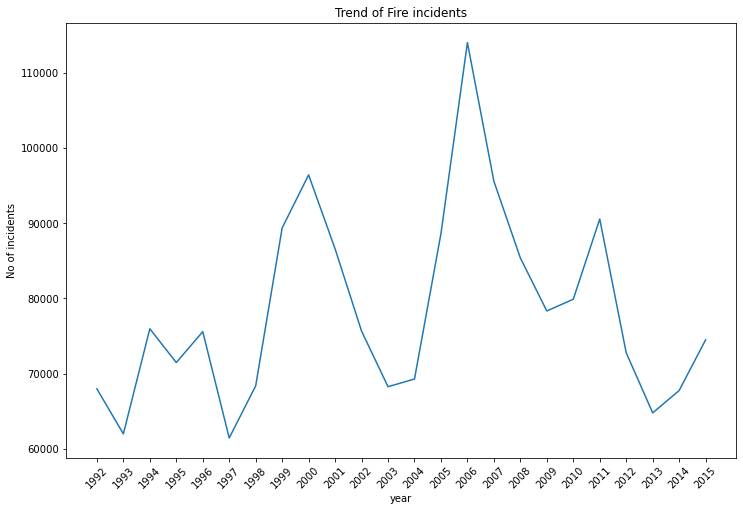

In [8]:
plt.figure(figsize = (12,8))
plt.plot(Trend.index, Trend)
plt.xlabel('year')
plt.ylabel('No of incidents')
plt.title('Trend of Fire incidents')
plt.xticks(Trend.index, rotation=45)
plt.show()

From the above figure, it is can be said that the number of fire incidents are of cyclic nature. 

# Question 2: What counties are the most and least fire-prone?

In [9]:
Top_county = df.COUNTY.value_counts().head(5)
Top_county.index

Index(['5', 'Lincoln', 'SUFFOLK', 'Polk', 'Washington'], dtype='object')

**These are TOP 5 counties most prone to wildfire.**

In [10]:
Bottom_county = df.COUNTY.value_counts().tail(5)
Bottom_county.index

Index(['KALAMAZOO                                         ',
       'WEXFORD                                           ',
       'BARAGA                                            ',
       'ARENAC                                            ', 'HARDY'],
      dtype='object')

**These are TOP 5 counties least prone to wildfire**

# Question 3: Given the size, location and date can you predict the cause of a fire wildfire?

In [11]:
X = df[['FIRE_SIZE','LATITUDE', 'LONGITUDE', 'DISCOVERY_DATE']]
Y = df['STAT_CAUSE_CODE']

In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.04566652945008709

**The above very low R^2 value of 0.04566652945008709 indiactes that our multiple linear regression model is not a good fit for the dat and we need to use polynomial regression for better fit of model.**

In [13]:
Y_hat = lm.predict(X)

C:\Users\ajinkya.patil\Anaconda31\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ajinkya.patil\Anaconda31\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='STAT_CAUSE_CODE', ylabel='Density'>

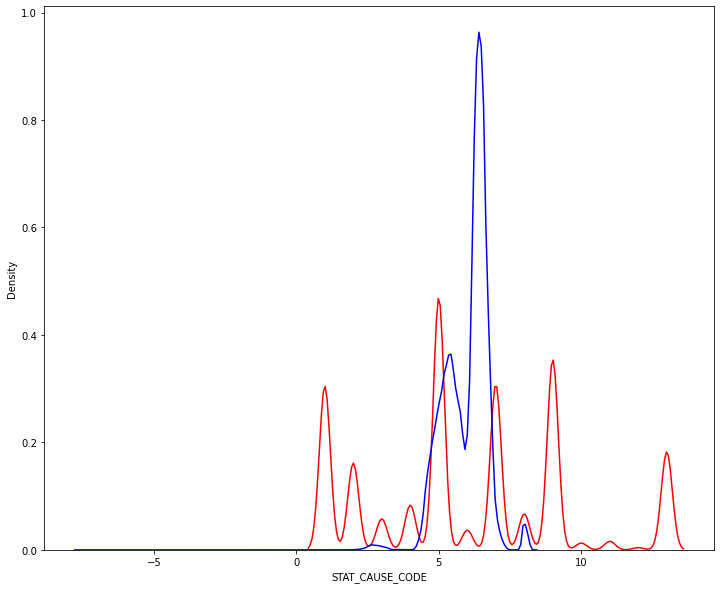

In [14]:
plt.figure(figsize=(12, 10))
import seaborn as sns

ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)